<a href="https://colab.research.google.com/github/leandroleao2k/PyLeao/blob/main/RegressaoLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Logística


**negrito**# Ex1 Logistic Regression trabalha a predição de variáveis com bi valores. 

In [ ]:
# 1 Import libs
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt



In [ ]:
#2 Carregar dados
temperatura =  [[30], [12], [14], [18], [25], [5], [15], [27], [28], [12], [14], [18], [25], [5], [15], [27]]
jaqueta = [False, True, True, True, False, True, True, False, False, True, True, True, False, True, True, False]

lr = LogisticRegression()
lr.fit(temperatura,jaqueta)
deveVestirJaqueta = [ [25], [4], [12], [35]]
lr.predict(deveVestirJaqueta)

array([False,  True,  True, False])

In [ ]:
#3 prepare the model 
#define the predictor variables and the response variable
X = temperatura
y = jaqueta

#4 split the dataset into training (80%) and testing (20%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 
print(X_train)
print(y_train)

#5 Fit the logist regression model
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#use model to make predictions on test data
y_pred = log_regression.predict(X_test)

print(y_pred)


[[5], [25], [14], [15], [14], [27], [27], [18], [18], [30], [5], [25]]
[True, False, True, True, True, False, False, True, True, False, True, False]
[ True  True False  True]


In [ ]:
#6 Model diagnostics
# create a confusion matrix to test model

print("y_test:", y_test, " y_pred:", y_pred )
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


y_test: [True, True, False, True]  y_pred: [ True  True False  True]
[[1 0]
 [0 3]]
Accuracy: 1.0


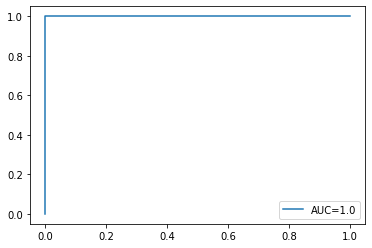

In [ ]:
#The higher the AUC (area under the curve), the more accurately our model is able to predict outcomes:
#define metrics
from sklearn.metrics import roc_auc_score

y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

try:
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC="+str(auc))
except ValueError:
    pass

#create ROC curve
plt.legend(loc=4)
plt.show()

# Exemplo SciKit Learn
## Regressao Logistica com a base da Iris

Computing regularization path ...
Levou 0.108s


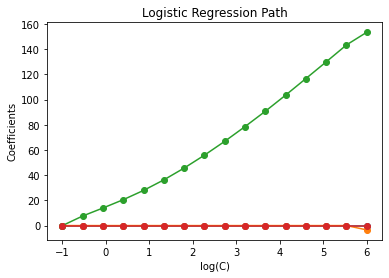

In [1]:

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 2]
y = y[y != 2]

X /= X.max()  # Normalize X to speed-up convergence

# #############################################################################
# Demo path functions

cs = l1_min_c(X, y, loss="log") * np.logspace(0, 7, 16)


print("Computing regularization path ...")
start = time()
clf = linear_model.LogisticRegression(
    penalty="l1",
    solver="liblinear",
    tol=1e-6,
    max_iter=int(1e6),
    warm_start=True,
    intercept_scaling=10000.0,
)
coefs_ = []
for c in cs:
    clf.set_params(C=c)
    clf.fit(X, y)
    coefs_.append(clf.coef_.ravel().copy())
print("Levou %0.3fs" % (time() - start))

coefs_ = np.array(coefs_)
plt.plot(np.log10(cs), coefs_, marker="o")
ymin, ymax = plt.ylim()
plt.xlabel("log(C)")
plt.ylabel("Coefficients")
plt.title("Logistic Regression Path")
plt.axis("tight")
plt.show()

#TODO Fazer o model diagnostic

In [ ]:
#6 Model diagnostics
# create a confusion matrix to test model


# MatPlot


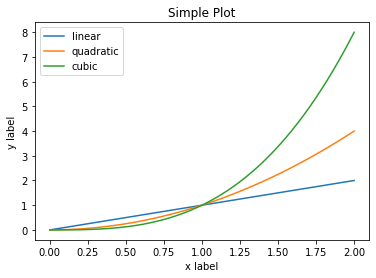

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 2, 1000)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots( )
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.